In [1]:
"""Gaussian Mixtures for Anomaly Detection"""
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

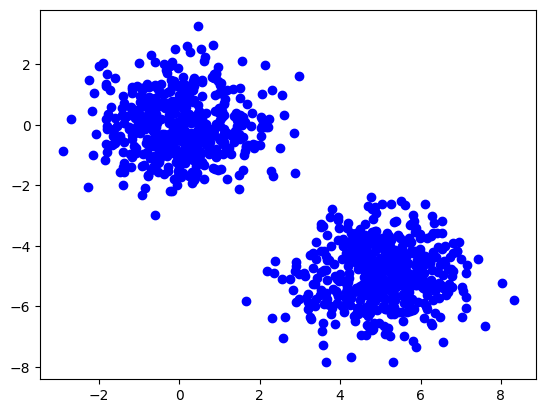

In [2]:
x1, y1 = make_blobs(n_samples=1000,
                   centers=((5,-5),(0,0)))
plt.scatter(x1[:,0],x1[:,1],color='b')
plt.show()

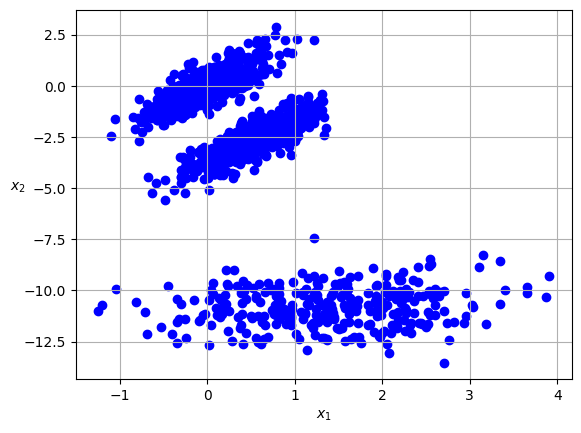

In [3]:
x1 = x1.dot(np.array([[0.3, 0.30], [0.20, 0.85]]))
x2, y2 = make_blobs(n_samples=300, centers=1)
x2 = x2 + [7, -9]
x = np.r_[x1,x2]
y = np.r_[y1,y2]
plt.scatter(x[:,0],x[:,1],color='b')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$",rotation=0)
plt.grid()
plt.show()

In [4]:
# I'll train a Gaussian mixture model on dataset:
gm = GaussianMixture(
    n_components=3,n_init=10
)
gm.fit(x)

GaussianMixture(n_components=3, n_init=10)

In [14]:
'''I can estimate the density of the model at any given location. for each instance it is given,
 this estimates the log of the probability density function (PDF) at that location. The greater
 the score, the higher the density'''
gm.score_samples(x)

array([-2.50711575, -3.03903011, -1.21468092, ..., -3.85301792,
       -3.60893479, -3.96965762])

In [20]:
from matplotlib.colors import LogNorm
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        threshold = weights.max() / 10
        centroids = centroids[weights > threshold]

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_gaussian_mixture(cluster,x,resolution = 100,show_ylabels=True):

  pieces = 100
  xmin = x.min(axis=0) - 0.1
  xmax = x.max(axis=0) + 0.1
  xhor = np.linspace(xmin[0],xmax[0],pieces)
  xver = np.linspace(xmin[1],xmax[1],pieces)
  xv,yv = np.meshgrid(xhor,xver)
  z1 = -cluster.score_samples(np.c_[xv.ravel(),yv.ravel()])
  z1=z1.reshape(xv.shape)
  plt.contourf(xv, yv, z1,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
  plt.contour(xv, yv, z1,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')
  plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2) # data points
  z2 = cluster.predict(np.c_[xv.ravel(),yv.ravel()])
  z2 = z2.reshape(xv.shape)
  plt.contour(xv,yv,z2,
              linewidths=1.5, colors='r', linestyles='dashed')
  plot_centroids(cluster.means_,weights=cluster.weights_)
  plt.xlabel("$x_1$")
  if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)

In [18]:
# Anomaly Detection - let's find anomalies first
densities = gm.score_samples(x)
# define a threshold density below which an instance becomes an anomaly
density_threshold = np.percentile(densities,2)
anomalies = x[densities < density_threshold]

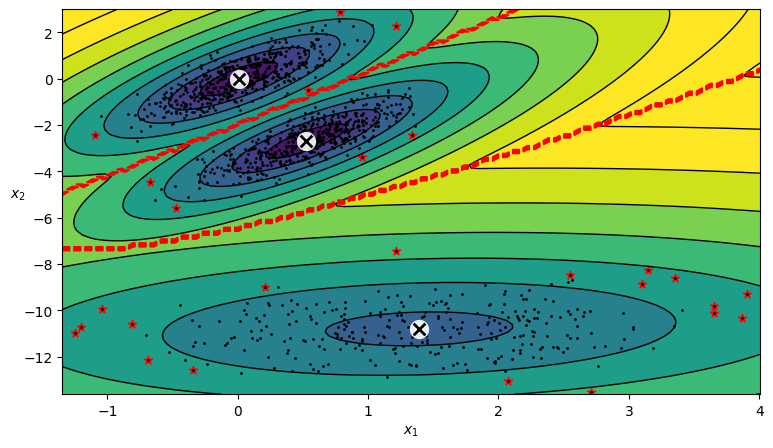

In [19]:
# I will now plot those anomalies with red stars
plt.figure(figsize=(9, 5))
plot_gaussian_mixture(gm,x)
plt.scatter(anomalies[:,0],anomalies[:,1],
            c='r',marker='*')
plt.show()

In [ ]:
'''Using a Gaussian mixture model for anomaly detection is straightforward: any instance
found in a region of low density can be flagged as an anomaly. The key is to define the
density threshold you want to use. For instance, in a manufacturing setting aiming to
detect defective products, the known ratio of defective products can guide this
 threshold. Let's say this ratio is 2%. In such a case, you set the density threshold to
  a value where approximately 2% of instances fall below it.
Adjusting this threshold allows you to manage false positives (legitimate products
incorrectly identified as defective) and false negatives (defective products missed by
the system). If you observe too many false positives, you can lower the threshold. Conversely,
if there are too many false negatives, raising the threshold may be beneficial. This trade-off
between precision and recall is a common consideration in anomaly detection systems.'''